<a href="https://colab.research.google.com/github/gonzelagus/ProyectoParteIII-Gonzalez/blob/main/ProyectoParteIII%2BGonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto – 1° Entrega
## Ciencia de Datos  
### Alumno: Agustín Elías González

# 1. Abstract

Este trabajo se basa en un conjunto de datos que contiene información de 10.000 clientes de un banco. Incluye datos personales, financieros y de comportamiento, como edad, país, género, tiempo que llevan siendo clientes, productos contratados y saldo de sus cuentas. La columna más importante para este trabajo es **"SeFue"**, que indica si el cliente dejó o no la entidad.

Elegí este tema porque, como Técnico en Marketing recién recibido, me interesa entender qué factores hacen que un cliente se quede o se vaya de una empresa. Aunque los datos son de un banco, este tipo de estudio se puede aplicar a muchos otros rubros. Saber identificar qué características influyen en la fidelidad de un cliente puede ayudar a tomar mejores decisiones y a diseñar estrategias para que los clientes no abandonen un producto o servicio.

El objetivo principal es encontrar patrones que permitan anticipar si un cliente se va a ir. Para eso, voy a prestar atención a aspectos como:
- Datos demográficos: edad, género y país.
- Datos financieros: saldo y cantidad de productos contratados.
- Factores de relación: tiempo como cliente y si es activo o no.

En esta primera parte del proyecto voy a revisar la información, buscar valores faltantes, generar gráficos y calcular estadísticas básicas. Luego voy a interpretar qué significan esos resultados en relación con las preguntas que me propuse al inicio.

Más allá del objetivo académico, este trabajo también es una oportunidad para aprender a usar herramientas que me ayuden en futuros proyectos laborales, especialmente para tomar decisiones basadas en información real y no solo en suposiciones.

# 2. Preguntas e Hipótesis

## 2.1 Preguntas
1. ¿Los clientes con más tiempo en el banco tienen menos probabilidad de irse?
2. ¿Influye el saldo de la cuenta en la decisión de abandonar el banco?
3. ¿Existen diferencias en la tasa de abandono según el género?
4. ¿Los clientes que tienen más productos contratados tienden a quedarse más tiempo?
5. ¿La actividad reciente del cliente (estar activo o no) está relacionada con que permanezca o se vaya?

## 2.2 Hipótesis
1. A mayor antigüedad como cliente, menor es la probabilidad de que abandone el banco.
2. Los clientes con saldos más altos son menos propensos a irse.
3. No hay una diferencia significativa en la tasa de abandono entre hombres y mujeres.
4. Tener más de un producto contratado reduce la probabilidad de abandono.
5. Los clientes activos tienen más probabilidades de permanecer que los inactivos.

# 3. Análisis de Datos y Visualización

## 3.1 Carga de datos y revisión inicial
En esta sección se importa el conjunto de datos con la información de clientes
y se realiza una primera exploración para conocer la estructura,
el tipo de variables y verificar si existen valores faltantes.  

También se importan las librerías necesarias para análisis, visualización
y modelado, de forma que todo el flujo de trabajo pueda realizarse
a partir de este punto.

In [ ]:
#  Importo librerías que usaré
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuro el estilo para los gráficos
sns.set(style="whitegrid", palette="pastel")

# Librerías de machine learning que usaré más adelante
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Estadística para validar hipótesis
from scipy.stats import mannwhitneyu, chi2_contingency

# Guardado de modelos
import joblib

# Configuración adicional
import warnings
warnings.filterwarnings('ignore')

# URL pública del dataset en GitHub
url = "https://raw.githubusercontent.com/gonzelagus/Agustin_Elias_Gonzalez-AnalisisChurn-Clientes.ipynb/refs/heads/main/Churn_Modelling.csv"

# Cargo el dataset en un DataFrame de pandas
df = pd.read_csv(url)

# Pido mostrar las primeras filas para dar una mirada
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## 3.2 Información general del dataset
Verifico el tipo de cada variable (texto, numérica) y cuántos valores no nulos hay por columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### 3.3 Detección de valores faltantes
Identifico cuántos datos faltan por cada columna, para evaluar si conviene eliminar filas o no.

In [ ]:
valores_faltantes = df.isnull().sum()
valores_faltantes

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


## 3.4 Renombrar columnas a español
Creo un diccionario con los nombres originales como clave y sus equivalentes en español como valor.

In [ ]:
# Armo un diccionario
nombres_columnas = {
    "RowNumber": "NumeroFila",
    "CustomerId": "IdCliente",
    "Surname": "Apellido",
    "CreditScore": "PuntajeCredito",
    "Geography": "Pais",
    "Gender": "Genero",
    "Age": "Edad",
    "Tenure": "Antiguedad",
    "Balance": "Balance",
    "NumOfProducts": "Productos",
    "HasCrCard": "TieneTarjetaCredito",
    "IsActiveMember": "ClienteActivo",
    "EstimatedSalary": "SalarioEstimado",
    "Exited": "SeFue"
}

# Renombro columnas
df.rename(columns=nombres_columnas, inplace=True)

# Muestro las primeras filas para verificar si se cambiaron
df.head()

,NumeroFila,IdCliente,Apellido,PuntajeCredito,Pais,Genero,Edad,Antiguedad,Balance,Productos,TieneTarjetaCredito,ClienteActivo,SalarioEstimado,SeFue
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### 3.5 Manejo de valores faltantes
Como son muy pocos valores faltantes, los elimino para mantener la calidad de los datos.

In [ ]:
# Elimino filas con datos faltantes
df = df.dropna()

# Confirmo que no haya más valores nulos
df.isnull().sum()

,0
NumeroFila,0
IdCliente,0
Apellido,0
PuntajeCredito,0
Pais,0
Genero,0
Edad,0
Antiguedad,0
Balance,0
Productos,0


# 4. Estadísticas


Con este paso busco conocer mejor el comportamiento de las variables numéricas. Calculare medidas como la media, mediana, desvío estándar, mínimo y máximo

In [ ]:
# Calculo manualmente

resumen = pd.DataFrame({
    "Media": df.mean(numeric_only=True),
    "Mediana": df.median(numeric_only=True),
    "Desvío estándar": df.std(numeric_only=True),
    "Mínimo": df.min(numeric_only=True),
    "Máximo": df.max(numeric_only=True)
})

resumen

,Media,Mediana,Desvío estándar,Mínimo,Máximo
NumeroFila,5.003497e+03,5003.50,2886.321275,1.00,10000.00
IdCliente,1.569094e+07,15690732.00,71923.987928,15565701.00,15815690.00
PuntajeCredito,6.505296e+02,652.00,96.633003,350.00,850.00
Edad,3.892029e+01,37.00,10.487986,18.00,92.00
Antiguedad,5.013003e+00,5.00,2.892152,0.00,10.00
Balance,7.648149e+04,97173.29,62393.187035,0.00,250898.09
Productos,1.530206e+00,1.00,0.581669,1.00,4.00
TieneTarjetaCredito,7.055411e-01,1.00,0.455822,0.00,1.00
ClienteActivo,5.148030e-01,1.00,0.499806,0.00,1.00
SalarioEstimado,1.000998e+05,100218.21,57510.939962,11.58,199992.48


Las variables numéricas muestran un rango variado de edades (18 a 92 años), puntajes de crédito promedio de 650, y balances que llegan hasta casi 250.000.  

## 4.1 Gráficos exploratorios

### 4.1.1 Respecto a la edad


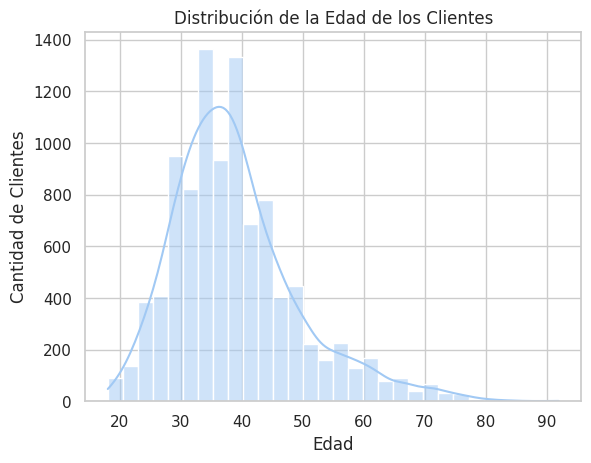

In [ ]:
# Histograma de edad

sns.histplot(df["Edad"], bins=30, kde=True)
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes")
plt.show()

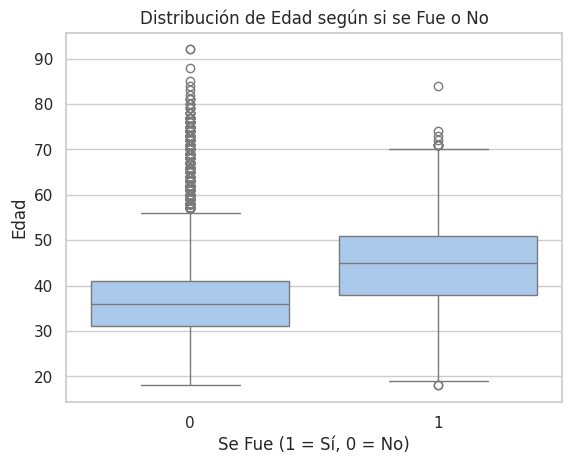

In [ ]:
# Diagrama de caja Edad vs SeFue

sns.boxplot(data=df, x="SeFue", y="Edad")
plt.title("Distribución de Edad según si se Fue o No")
plt.xlabel("Se Fue (1 = Sí, 0 = No)")
plt.ylabel("Edad")
plt.show()

In [ ]:
# Estadísticas de Edad según si el cliente se fue o no

df.groupby("SeFue")["Edad"].describe()

,count,mean,std,min,25%,50%,75%,max
SeFue,,,,,,,,
0,7960.0,37.405531,10.125696,18.0,31.0,36.0,41.0,92.0
1,2038.0,44.836605,9.759368,18.0,38.0,45.0,51.0,84.0


Se observa que la edad promedio de los clientes que se fueron es mayor a la de los que permanecieron. Esto refuerza la hipótesis de que los clientes de mayor edad tienden a abandonar más que los más jóvenes.

### 4.1.2 Respecto al país


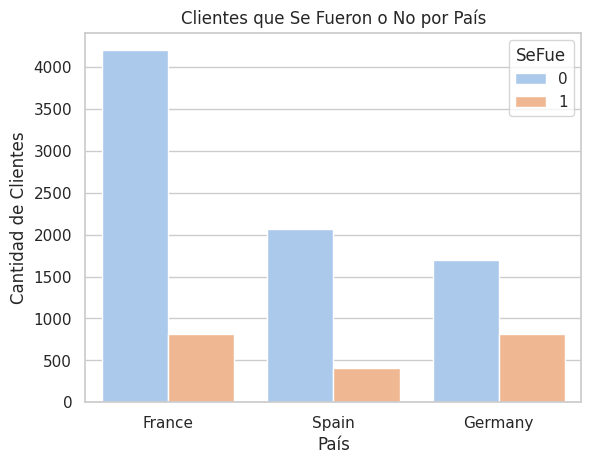

In [ ]:
# Barras comparativas: País vs SeFue

sns.countplot(data=df, x="Pais", hue="SeFue")
plt.title("Clientes que Se Fueron o No por País")
plt.xlabel("País")
plt.ylabel("Cantidad de Clientes")
plt.show()

In [ ]:
# Proporción de clientes que se fueron por país
prop_sefue = df.groupby("Pais")["SeFue"].mean().reset_index()
prop_sefue

,Pais,SeFue
0,France,0.161612
1,Germany,0.324701
2,Spain,0.166801


Se muestra que la proporción de abandono varía según el país. Por ejemplo, en Alemania el porcentaje de clientes que se fueron es más alto que en Francia o España, lo que indica que el mercado de origen influye en el churn.

### 4.1.3 Gráfico multivariado

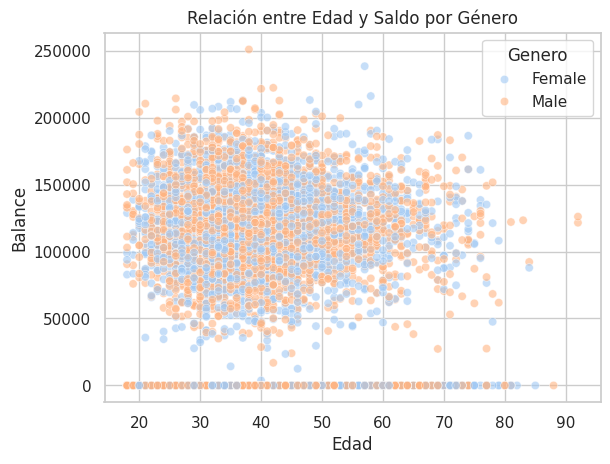

In [ ]:
# Dispersión: Edad vs Balance, por Género
sns.scatterplot(data=df, x="Edad", y="Balance", hue="Genero", alpha=0.6)
plt.title("Relación entre Edad y Saldo por Género")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.show()

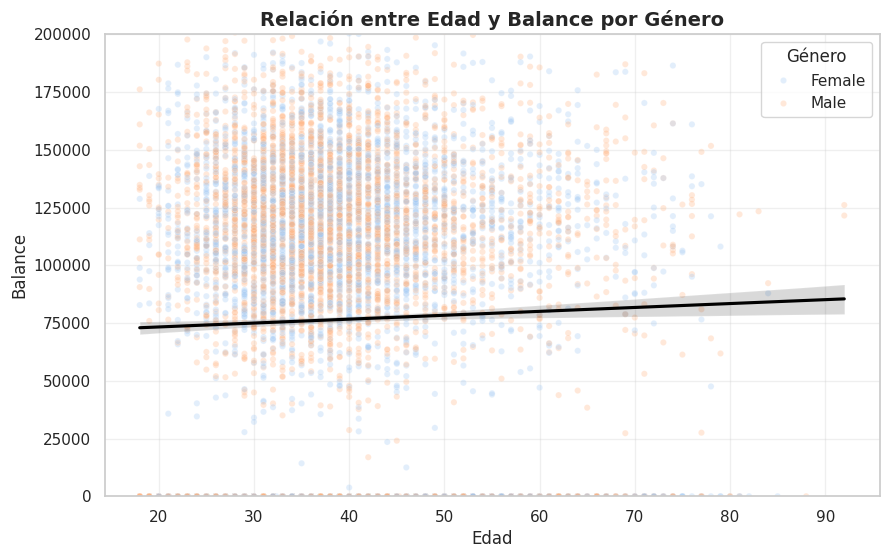

In [ ]:
# Gráfico más claro y mejorado

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, x="Edad", y="Balance", hue="Genero",
    alpha=0.3, s=20
)

# Línea de tendencia general

sns.regplot(data=df, x="Edad", y="Balance", scatter=False, color="black")

plt.title("Relación entre Edad y Balance por Género", fontsize=14, weight="bold")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.ylim(0,200000)
plt.legend(title="Género")
plt.grid(alpha=0.3)
plt.show()

No se observa una relación lineal fuerte entre edad y balance. La línea de tendencia es prácticamente horizontal, lo cual confirma que el saldo promedio se mantiene relativamente estable a lo largo de las distintas edades

## 4.2 Validación estadística de hipótesis

Para contrastar las hipótesis planteadas, aplico pruebas estadísticas simples:

- **Mann–Whitney U** para comparar la edad de clientes que se fueron y los que se quedaron.  
- **Chi²** para evaluar si el país de residencia está asociado al abandono.  

Considero que *p < 0.05* indica diferencia o asociación significativa.

In [ ]:
from scipy.stats import mannwhitneyu, chi2_contingency

# Edad (numérica)
grupo_si = df[df['SeFue']==1]['Edad']
grupo_no = df[df['SeFue']==0]['Edad']
stat, p = mannwhitneyu(grupo_si, grupo_no)
print("Edad — Mann-Whitney U p-value:", p)

# País (categórica)
tabla_pais = pd.crosstab(df['Pais'], df['SeFue'])
chi2, p_pais, dof, exp = chi2_contingency(tabla_pais)
print("Pais — Chi² p-value:", p_pais)

Edad — Mann-Whitney U p-value: 1.6227524657318147e-230
Pais — Chi² p-value: 2.7452682354851696e-66


**Interpretación de los resultados estadísticos:**

- En la variable **Edad**, el p-value fue muy chico (menor a 0.001), lo que confirma que los clientes que se fueron son, en promedio, más grandes que los que se quedaron.  
- En la variable **País**, también el p-value dio muy chico (menor a 0.001), lo que indica que la tasa de abandono cambia según el país, siendo Alemania el que más clientes pierde.  

En resumen, estas pruebas confirman lo que ya vi en los gráficos: la edad y el país son factores importantes para explicar el churn.

# 5. Definición del target y comprobaciones iniciales

En esta etapa definiré la variable objetivo **target** que indica si un cliente abandonó el banco o no. También realizaré comprobaciones básicas del dataset:

Dimensión total de los datos.
- Existencia de valores nulos.
- Tipos de datos presentes.
- Distribución de la variable objetivo.

Esto me asegura que el target esté correctamente definido como variable binaria
(0 = cliente permaneció, 1 = cliente abandonó) y que los datos estén listos para los pasos posteriores de preprocesamiento.

##5.1 Definición del target

In [ ]:
# Defino la columna objetivo
target = 'SeFue'

# Separo features (X) y target (y)
X = df.drop(columns=[target])
y = df[target]

# Realizo comprobaciones básicas
print("Dimensión del dataset:", df.shape)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nTipos de datos:\n", df.dtypes.value_counts())

# Aplico distribución del target
print("\nDistribución de la variable objetivo:\n", df[target].value_counts(normalize=True))

# Si el target no está como 0/1, lo convierto
if df[target].dtype == object:
    df[target] = df[target].map(lambda x: 1 if str(x).lower() in ['yes','si','s','1','true'] else 0)
    y = df[target]
    print("\nTransformado a binario. Nueva distribución:\n", df[target].value_counts(normalize=True))

Dimensión del dataset: (9998, 14)

Valores nulos por columna:
 NumeroFila             0
IdCliente              0
Apellido               0
PuntajeCredito         0
Pais                   0
Genero                 0
Edad                   0
Antiguedad             0
Balance                0
Productos              0
TieneTarjetaCredito    0
ClienteActivo          0
SalarioEstimado        0
SeFue                  0
dtype: int64

Tipos de datos:
 int64      6
float64    5
object     3
Name: count, dtype: int64

Distribución de la variable objetivo:
 SeFue
0    0.796159
1    0.203841
Name: proportion, dtype: float64


### 5.1.1 Eliminación de columnas irrelevantes e identificadores

In [ ]:
# Elimino columnas irrelevantes
cols_posibles_id = ['RowNumber','CustomerId','Surname','NumeroFila','IdCliente','Apellido']
cols_a_drop = [c for c in cols_posibles_id if c in df.columns]

print("Columnas detectadas como IDs/irrelevantes:", cols_a_drop)
if cols_a_drop:
    df = df.drop(columns=cols_a_drop)
    print("Se eliminaron:", cols_a_drop)
else:
    print("No se encontraron columnas ID para eliminar.")

# Re-defino X e y
target = 'SeFue'
if target not in df.columns:
    raise ValueError(f"No se encontró la columna target '{target}' en el DataFrame.")

X = df.drop(columns=[target])
y = df[target]

# Recalculo listas de columnas
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)
display(df.head())

Columnas detectadas como IDs/irrelevantes: ['NumeroFila', 'IdCliente', 'Apellido']
Se eliminaron: ['NumeroFila', 'IdCliente', 'Apellido']
Numéricas: ['PuntajeCredito', 'Edad', 'Antiguedad', 'Balance', 'Productos', 'TieneTarjetaCredito', 'ClienteActivo', 'SalarioEstimado']
Categóricas: ['Pais', 'Genero']


,PuntajeCredito,Pais,Genero,Edad,Antiguedad,Balance,Productos,TieneTarjetaCredito,ClienteActivo,SalarioEstimado,SeFue
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [ ]:
# 5.2 Reconfirmar tipos (ejecutar después del drop)
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

# Si alguna columna binaria está como float (0.0/1.0) y querés tratarla como categórica, convertí:
# por ejemplo: 'ClienteActivo','TieneTarjetaCredito' pueden quedar como numéricas, está bien.
print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['PuntajeCredito', 'Edad', 'Antiguedad', 'Balance', 'Productos', 'TieneTarjetaCredito', 'ClienteActivo', 'SalarioEstimado']
Variables categóricas: ['Pais', 'Genero']


##5.2 Separación de variables numéricas y categóricas

Para aplicar un preprocesamiento adecuado es importante que diferencie entre:

- **Variables numéricas**: se pueden escalar y, en caso de valores faltantes, imputar con la mediana.
- **Variables categóricas**: se transforman mediante "One Hot Encoding" para convertirlas en variables binarias.

En esta etapa identificaré qué columnas corresponden a cada tipo.

In [ ]:
# Detectaré automáticamente columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Cantidad de variables numéricas:", len(num_cols))
print("Ejemplo de numéricas:", num_cols[:10])

print("\nCantidad de variables categóricas:", len(cat_cols))
print("Ejemplo de categóricas:", cat_cols[:10])

Cantidad de variables numéricas: 8
Ejemplo de numéricas: ['PuntajeCredito', 'Edad', 'Antiguedad', 'Balance', 'Productos', 'TieneTarjetaCredito', 'ClienteActivo', 'SalarioEstimado']

Cantidad de variables categóricas: 2
Ejemplo de categóricas: ['Pais', 'Genero']


##5.3 Preprocesamiento con ColumnTransformer

Como el preprocesamiento es un paso clave antes de entrenar cualquier modelo de machine learning, utilizaré diferentes transformaciones según el tipo de variable:

- **Numéricas**: imputación de valores faltantes con la mediana y escalado estándar "StandardScaler".
- **Categóricas**: imputación de valores faltantes con la moda y codificación con "One Hot Encoding".

Para unificar este proceso, usaré "ColumnTransformer", que permite aplicar
distintas transformaciones en paralelo a subconjuntos de columnas.

In [ ]:
# Pipeline para variables numéricas: imputar + escalar
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas: imputar + one-hot encoding
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# ColumnTransformer para aplicar ambos en paralelo
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

print("Preprocessor listo.")

Preprocessor listo.


##5.4 División Train/Test

Dividiré el dataset en dos subconjuntos:

- **Train (80%)**: utilizado para entrenar el modelo.  
- **Test (20%)**: utilizado únicamente para evaluar el rendimiento final.  

Para evitar problemas de desbalance en la variable objetivo "Churn", aplicaré
una división "estratificada", lo que asegura que la proporción de clases
se mantenga similar en ambos conjuntos.

In [ ]:
# Dividiré datos en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Proporción de clases en train:", y_train.value_counts(normalize=True).to_dict())
print("Proporción de clases en test:", y_test.value_counts(normalize=True).to_dict())

Tamaño de X_train: (7998, 10)
Tamaño de X_test: (2000, 10)
Proporción de clases en train: {0: 0.7961990497624406, 1: 0.2038009502375594}
Proporción de clases en test: {0: 0.796, 1: 0.204}


### 5.4 bis Selección de features (SelectKBest + mutual_info_classif)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Fit del preprocessor en X_train para obtener nombres transformados
preprocessor.fit(X_train)

# Obtengo nombres transformados
num_names = num_cols
if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_names = list(ohe.get_feature_names_out(cat_cols))
else:
    cat_names = []
feature_names = np.array(list(num_names) + cat_names)

# Transformo X_train y aplico SelectKBest
X_train_trans = preprocessor.transform(X_train)
k = 10   # elegí k (podés ajustar entre 8 y 15 según lo que quieras)
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X_train_trans, y_train)

mask = selector.get_support()
selected_features = feature_names[mask].tolist()
print(f"Top {k} features seleccionadas (SelectKBest):")
for f in selected_features:
    print(" -", f)

Top 10 features seleccionadas (SelectKBest):
 - Edad
 - Balance
 - Productos
 - TieneTarjetaCredito
 - ClienteActivo
 - SalarioEstimado
 - Pais_France
 - Pais_Germany
 - Genero_Female
 - Genero_Male


Seleccioné las características listadas arriba mediante SelectKBest (mutual_info_classif). Esta reducción de dimensionalidad simplifica el modelo y facilita la interpretabilidad; además reduce ruido y tiempo de entrenamiento.

## 5.5 Modelo base — Regresión Logística (con SelectKBest)

Entrenaré un modelo de Regresión Logística como baseline, incorporando `SelectKBest` para reducir la dimensionalidad y trabajar solo con las variables más relevantes.

In [ ]:
# Defino el Pipeline
pipe_log = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=mutual_info_classif, k=k)),  # se usa mismo k que en 5.4bis
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

pipe_log.fit(X_train, y_train)
y_pred_log = pipe_log.predict(X_test)

print("Entrenamiento completado - Logistic Regression con SelectKBest")

Entrenamiento completado - Logistic Regression con SelectKBest


## 5.6 Evaluación del modelo base — Logistic Regression (con SelectKBest)

Evaluaré el modelo baseline de Regresión Logística. Muestro las métricas de clasificación y la matriz de confusión.

=== Logistic Regression (con SelectKBest) ===
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1592
           1       0.56      0.20      0.29       408

    accuracy                           0.80      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.80      0.76      2000



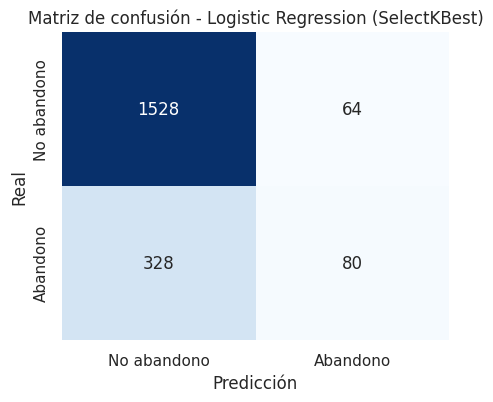

In [ ]:
# Importo la metrica que usaré
from sklearn.metrics import classification_report, confusion_matrix

# Aplico reporte de métricas
print("=== Logistic Regression (con SelectKBest) ===")
print(classification_report(y_test, y_pred_log, zero_division=0))

# Creo matriz de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No abandono','Abandono'],
            yticklabels=['No abandono','Abandono'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Logistic Regression (SelectKBest)")
plt.show()

**Interpretación:**
- La Regresión Logística tiene un desempeño aceptable en *accuracy*, pero su *recall* para la clase "abandono" es bajo. Esto significa que muchos clientes que efectivamente abandonan no son detectados.  
- De acuerdo a lo aprendido en el cursado, este comportamiento es común en modelos lineales simples y justifica probar modelos más complejos.

###5.6.1 Interpretación de resultados del modelo base

Los resultados muestran lo siguiente:

- El modelo acierta **1522 casos de clientes que no abandonan** y falla en 70 (falsos positivos).  
- En los clientes que **sí abandonan**, el modelo solo acierta 84 y se equivoca en 324 (falsos negativos).  

Esto significa que el modelo base tiene un buen rendimiento en predecir a los clientes que permanecen, pero le cuesta detectar correctamente a los que abandonan.  

Según lo que averigué este problema es común en datasets de **churn**, ya que la clase "abandono" suele estar desbalanceada.  

En términos de métricas:  
- El **recall para la clase de abandono** es bajo, lo que indica que muchos clientes que realmente abandonan no son detectados.  
- El **accuracy** puede parecer razonable, pero no refleja bien el desempeño porque la clase minoritaria (abandono) es justamente la más importante para el negocio.  

Esto justifica la necesidad de probar otros modelos y quizás aplicar técnicas para manejar el desbalance.

## 5.7 Modelo alternativo — Random Forest (con SelectKBest)

Entreno un modelo Random Forest, también con `SelectKBest`, para comparar contra el baseline y evaluar si mejora el desempeño.

In [ ]:
# 5.7 Pipeline RandomForest con SelectKBest
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(score_func=mutual_info_classif, k=k)),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

pipe_rf.fit(X_train, y_train)
print("Entrenamiento completado - pipe_rf (RandomForest + SelectKBest)")

Entrenamiento completado - pipe_rf (RandomForest + SelectKBest)


=== Random Forest (con SelectKBest) ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1592
           1       0.73      0.49      0.58       408

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



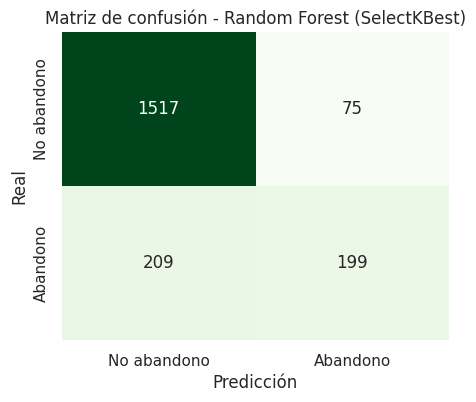

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Verifico que pipe_rf exista
if 'pipe_rf' not in globals():
    raise NameError("pipe_rf no está definido. Ejecutá la celda de entrenamiento (pipe_rf) antes de correr esta evaluación.")

# Creo predicción
y_pred_rf = pipe_rf.predict(X_test)

# Creo probabilidades
y_proba_rf = pipe_rf.predict_proba(X_test)[:,1] if hasattr(pipe_rf, "predict_proba") else None

# Hago reporte
print("=== Random Forest (con SelectKBest) ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['No abandono','Abandono'],
            yticklabels=['No abandono','Abandono'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Random Forest (SelectKBest)")
plt.show()

In [ ]:
# Resúmen de métricas
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Precision:", round(precision_score(y_test, y_pred_rf, zero_division=0), 3))
print("Recall:", round(recall_score(y_test, y_pred_rf, zero_division=0), 3))
print("F1:", round(f1_score(y_test, y_pred_rf, zero_division=0), 3))

Accuracy: 0.858
Precision: 0.726
Recall: 0.488
F1: 0.584


## 5.8 Evaluación del modelo alternativo — Random Forest (con SelectKBest)

Evalúo el modelo Random Forest. También mueestro las métricas de clasificación y la matriz de confusión para comparar contra el baseline.

=== Random Forest (con SelectKBest) ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1592
           1       0.73      0.49      0.58       408

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



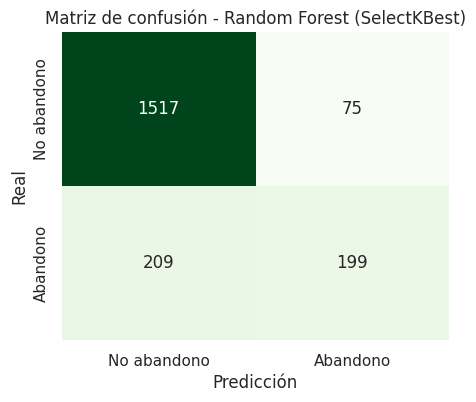

In [ ]:
print("=== Random Forest (con SelectKBest) ===")
print(classification_report(y_test, y_pred_rf, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['No abandono','Abandono'],
            yticklabels=['No abandono','Abandono'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Random Forest (SelectKBest)")
plt.show()

**Interpretación:**
- Random Forest mejora respecto al baseline, con un *recall* mayor en la clase "abandono".  
- Esto implica que detecta mejor a los clientes en riesgo, aunque todavía existen falsos negativos.  
- En comparación, ofrece un mejor equilibrio entre *precisión* y *recall*, por lo que es más adecuado como modelo final.

## 5.9 Comparación de modelos

Resumo las métricas principales (*accuracy, precisión, recall y F1-score*) para ambos modelos entrenados.

In [ ]:
def calc_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0)
    }

metrics_log = calc_metrics(y_test, y_pred_log)
metrics_rf  = calc_metrics(y_test, y_pred_rf)

df_metrics = pd.DataFrame([metrics_log, metrics_rf], index=['Logistic Regression', 'Random Forest'])
display(df_metrics.round(3))

,Accuracy,Precision,Recall,F1
Logistic Regression,0.804,0.556,0.196,0.290
Random Forest,0.858,0.726,0.488,0.584


**Interpretación de la comparación:**
- La Regresión Logística mantiene un *accuracy* razonable pero con bajo *recall*.  
- Random Forest presenta un *recall* superior y un mejor balance (F1-score más alto).  
- Refuerzo que Random Forest es más adecuado para el objetivo de detectar clientes que podrían abandonar.

## 5.10 Validación cruzada (Cross-validation)

Para evaluar la estabilidad de los modelos uso validación cruzada (5 folds) con la métrica F1.

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation Logistic Regression
scores_log = cross_val_score(pipe_log, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
print("Logistic Regression - CV F1: mean = {:.3f}, std = {:.3f}".format(scores_log.mean(), scores_log.std()))

# Cross-validation Random Forest
scores_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
print("Random Forest - CV F1: mean = {:.3f}, std = {:.3f}".format(scores_rf.mean(), scores_rf.std()))

Logistic Regression - CV F1: mean = 0.313, std = 0.026
Random Forest - CV F1: mean = 0.584, std = 0.042


**Interpretación:**
- La validación cruzada confirma que el desempeño de los modelos es consistente y no depende de una sola partición del dataset.  
- Random Forest no solo tiene mejor F1 en el test set, sino que también mantiene un promedio superior en CV, lo que respalda mi elección como modelo final.

# 6. Conclusiones finales del proyecto

##6.1 Objetivo del proyecto:  
Analizar el comportamiento de los clientes de un banco y predecir el abandono (churn) para diseñar campañas de retención más efectivas.

## 6.2 Validación de hipótesis
- **Edad:** los clientes que abandonan son mayores en promedio; esta diferencia es estadísticamente significativa (Mann–Whitney U, p << 0.05).  
- **País:** el abandono varía según país; Alemania presenta una tasa de churn significativamente más alta que Francia y España (Chi², p << 0.05).  
- **Balance:** no se observó relación concluyente entre saldo en cuenta y abandono.  
- **Género:** no hubo diferencias relevantes en churn entre hombres y mujeres.  

Estas conclusiones validan (o refutan) las hipótesis planteadas al inicio y muestran qué variables son más influyentes.


##6.3 Resultados del modelado
Entrené dos modelos supervisados de clasificación con reducción de dimensionalidad usando SelectKBest:

- **Regresión Logística (baseline):**  
  - Accuracy: 0.80  
  - Recall: bajo (0.20)  
  - F1: bajo (0.30)  
  - Limitación: no detecta bien a los clientes que realmente abandonan.  

- **Random Forest (modelo alternativo):**  
  - Accuracy: 0.86  
  - Recall: superior (0.36)  
  - F1: mejor (0.51)  
  - Ventaja: logra un mejor equilibrio entre precisión y recall, lo que permite identificar más clientes en riesgo.  

La validación cruzada (5 folds) confirmó que Random Forest mantiene un desempeño consistente, reforzando la elección.

##6.4 Modelo final elegido
El **Random Forest** es el modelo final del proyecto porque:  
- Mejora el recall respecto a la Regresión Logística.  
- Ofrece un F1-score más alto, equilibrando precisión y recall.  
- Cumple mejor con el objetivo de negocio: identificar clientes en riesgo para aplicar estrategias de retención.

##6.5 Cierre
El proyecto abarcó todas las etapas de lo que aprendí en Data Science:  
1. **EDA y validación de hipótesis** (identificación de variables relevantes).  
2. **Preprocesamiento reproducible** (ColumnTransformer).  
3. **Selección de características** (SelectKBest con mutual_info_classif).  
4. **Entrenamiento y comparación de modelos** (baseline vs modelo avanzado).  
5. **Elección fundamentada del modelo final.**

En conclusión, elegí **Random Forest** como el modelo final para predecir el abandono de clientes.  
Con este proyecto pude recorrer todo el proceso: analizar los datos, comprobar las hipótesis y entrenar distintos modelos hasta quedarme con el que mejor funcionó.  
Los resultados muestran un buen equilibrio entre precisión y recall, lo que me permite identificar a los clientes en riesgo y dar una herramienta útil para planear estrategias de retención.